## FreeViewing Analysis
### 1. Data Description & Blacklist Generation

In [2]:
import pandas as pd

# CSVファイルの読み込み
df = pd.read_csv('../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_28sec.csv')

# 異常データの基準を定義
min_num_fixations = 30  # 最小フィクセーション数の閾値
max_mw_rate = 0.9       # 最大MW率の閾値
min_mw_rate = 0.1     # 最小MW率の閾値

# 各参加者のMW率を計算
participant_summary = df.groupby('Participant').agg(
    total_fixations=('NumFix', 'mean'),
    mw_rate=('MW', 'mean')
).reset_index()

# 異常データを持つ参加者を特定
blacklist = participant_summary[
    (participant_summary['total_fixations'] < min_num_fixations) |
    (participant_summary['mw_rate'] > max_mw_rate) |
    (participant_summary['mw_rate'] < min_mw_rate)
]

# ブラックリストに含まれない参加者のMW率を計算
valid_participants = participant_summary[~participant_summary['Participant'].isin(blacklist['Participant'])]
chance_level = valid_participants['mw_rate'].mean()
chance_level = round(max(1-chance_level, chance_level), 3)

# 結果の表示
print("ブラックリスト:")
print(blacklist)
print("ブラックリストに含まれる参加者:")
print(list(blacklist['Participant']))
print("ブラックリストを除いた参加者のMW率(チャンスレベル):")
print(chance_level)


ブラックリスト:
   Participant  total_fixations   mw_rate
13         22K         9.583333  0.625000
16         25I        12.125000  0.666667
18         27I        72.833333  0.083333
20         29N        23.875000  0.291667
22         30Y        76.125000  0.083333
24         32S        44.625000  0.000000
29         37T        65.791667  0.000000
31         39Y        21.000000  0.708333
38          8I        65.125000  0.000000
ブラックリストに含まれる参加者:
['22K', '25I', '27I', '29N', '30Y', '32S', '37T', '39Y', '8I']
ブラックリストを除いた参加者のMW率(チャンスレベル):
0.528


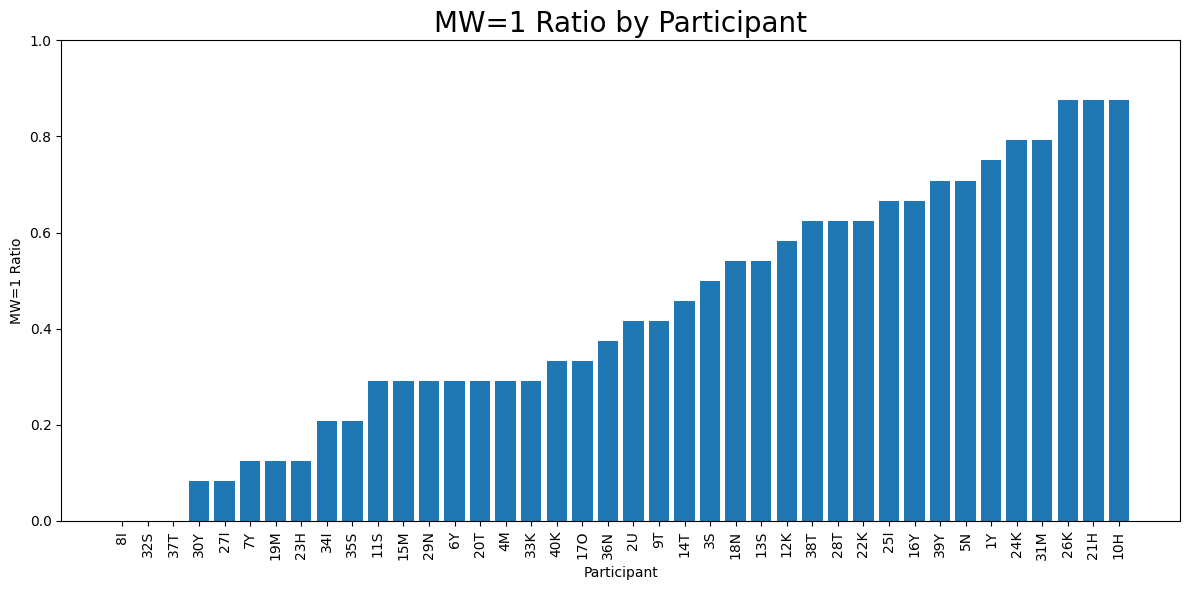

8I     0.000000
32S    0.000000
37T    0.000000
30Y    0.083333
27I    0.083333
7Y     0.125000
19M    0.125000
23H    0.125000
34I    0.208333
35S    0.208333
11S    0.291667
15M    0.291667
29N    0.291667
6Y     0.291667
20T    0.291667
4M     0.291667
33K    0.291667
40K    0.333333
17O    0.333333
36N    0.375000
2U     0.416667
9T     0.416667
14T    0.458333
3S     0.500000
18N    0.541667
13S    0.541667
12K    0.583333
38T    0.625000
28T    0.625000
22K    0.625000
25I    0.666667
16Y    0.666667
39Y    0.708333
5N     0.708333
1Y     0.750000
24K    0.791667
31M    0.791667
26K    0.875000
21H    0.875000
10H    0.875000
dtype: float64
Avg: 0.42708333333333337, Std: 0.2641558478735838, Max: 0.875, Min: 0.0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_28sec.csv')

# Create the MW column
df['MW'] = df['Attention'].apply(lambda x: 1 if x == 0 else 0)

# MW Analysis
# Count the number of times each participant had MW=1
mw_counts = df[df['MW'] == 1]['Participant'].value_counts()

# Include all participants, even those with 0 MW counts
all_participants = df['Participant'].unique()
mw_counts_full = pd.Series(0, index=all_participants)
mw_counts_full.update(mw_counts)

# Count total trials for each participant
total_trials = df['Participant'].value_counts()

# Convert MW counts to percentage
mw_percentage = (mw_counts_full / total_trials)

# Sort the data in ascending order
mw_percentage = mw_percentage.sort_values(ascending=True)

# Calculate statistics
mw_avg_full = mw_percentage.mean()
mw_sd_full = mw_percentage.std()
mw_max_full = mw_percentage.max()
mw_min_full = mw_percentage.min()

# Visualize the results with default color and in ascending order
plt.figure(figsize=(12, 6))
plt.bar(mw_percentage.index, mw_percentage.values)
plt.xlabel('Participant')
plt.ylabel('MW=1 Ratio')
plt.title('MW=1 Ratio by Participant', fontsize=20)
plt.ylim(0, 1)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print the results
print(mw_percentage, sep='\n')
print(f"Avg: {mw_avg_full}, Std: {mw_sd_full}, Max: {mw_max_full}, Min: {mw_min_full}")

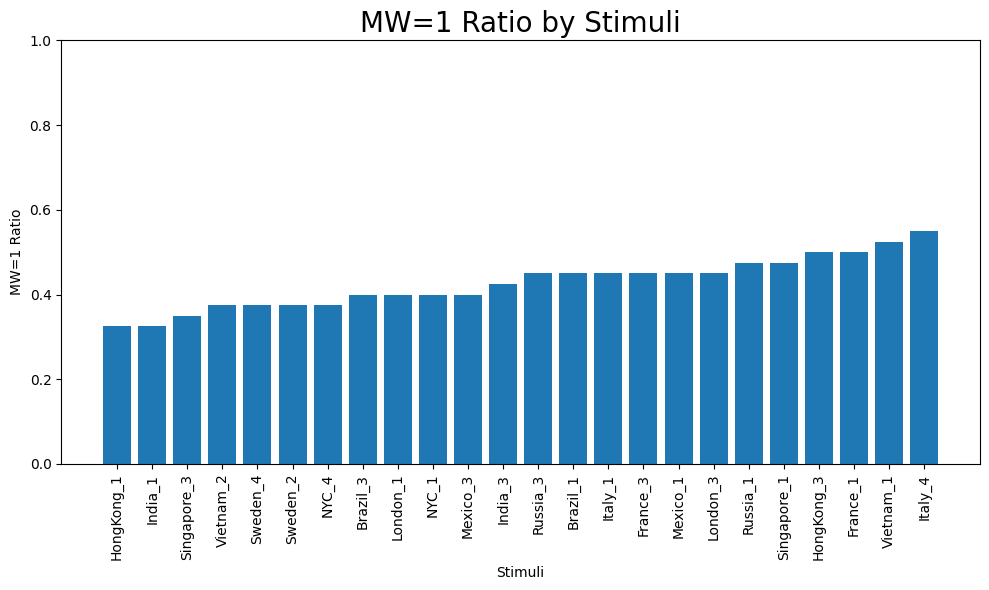

        Stimuli     MW
4    HongKong_1  0.325
6       India_1  0.325
19  Singapore_3  0.350
23    Vietnam_2  0.375
21     Sweden_4  0.375
20     Sweden_2  0.375
15        NYC_4  0.375
1      Brazil_3  0.400
10     London_1  0.400
14        NYC_1  0.400
13     Mexico_3  0.400
7       India_3  0.425
17     Russia_3  0.450
0      Brazil_1  0.450
8       Italy_1  0.450
3      France_3  0.450
12     Mexico_1  0.450
11     London_3  0.450
16     Russia_1  0.475
18  Singapore_1  0.475
5    HongKong_3  0.500
2      France_1  0.500
22    Vietnam_1  0.525
9       Italy_4  0.550
Avg: 0.4270833333333333, Std: 0.06030568267019983


In [2]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_28sec.csv')

# Create the MW column
df['MW'] = df['Attention'].apply(lambda x: 1 if x == 0 else 0)

# Calculate the percentage of Attention==0 for each Stimuli
mw_percentage = df.groupby('Stimuli')['MW'].apply(lambda x: (x == 1).mean()).reset_index()

# Sort the data for better visualization
mw_percentage = mw_percentage.sort_values(by='MW', ascending=True)

# Calculate mean and standard deviation
mean_attention_0 = mw_percentage['MW'].mean()
std_attention_0 = mw_percentage['MW'].std()

# Plot the bar plot with y-axis from 0 to 1
plt.figure(figsize=(10, 6))
plt.bar(mw_percentage['Stimuli'], mw_percentage['MW'])
plt.xlabel('Stimuli')
plt.ylabel('MW=1 Ratio')
plt.title('MW=1 Ratio by Stimuli', fontsize=20)
plt.ylim(0, 1)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print the results
print(mw_percentage)
print(f"Avg: {mean_attention_0}, Std: {std_attention_0}")

### Identify the best window size using the RF models
**3 models + global features**

**Global Features only**

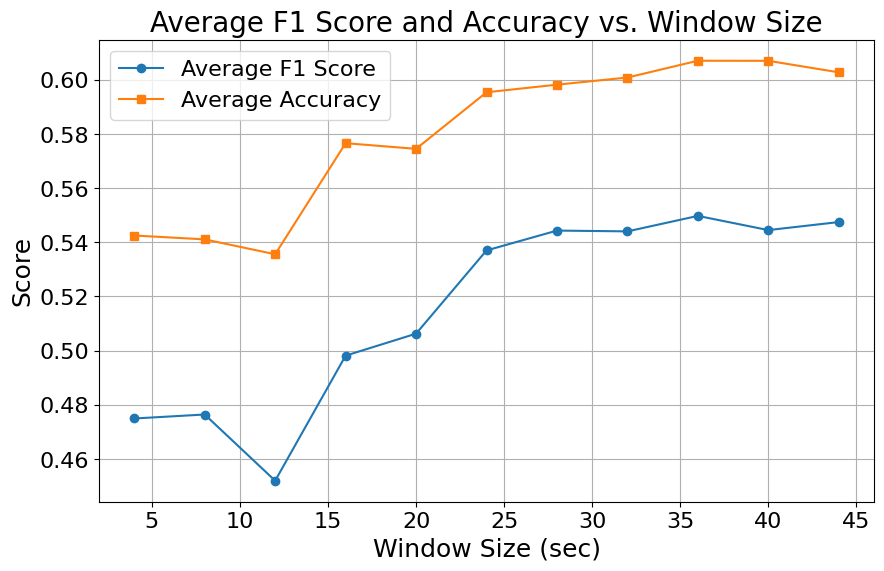

Window size: 4 sec, Average F1 score: 0.475, Average Accuracy: 0.543
Window size: 8 sec, Average F1 score: 0.476, Average Accuracy: 0.541
Window size: 12 sec, Average F1 score: 0.452, Average Accuracy: 0.536
Window size: 16 sec, Average F1 score: 0.498, Average Accuracy: 0.577
Window size: 20 sec, Average F1 score: 0.506, Average Accuracy: 0.575
Window size: 24 sec, Average F1 score: 0.537, Average Accuracy: 0.595
Window size: 28 sec, Average F1 score: 0.544, Average Accuracy: 0.598
Window size: 32 sec, Average F1 score: 0.544, Average Accuracy: 0.601
Window size: 36 sec, Average F1 score: 0.550, Average Accuracy: 0.607
Window size: 40 sec, Average F1 score: 0.545, Average Accuracy: 0.607
Window size: 44 sec, Average F1 score: 0.547, Average Accuracy: 0.603
Best window size (F1 score): 36 sec with average F1 score: 0.550


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score

# Load CSV files into DataFrames
window_sizes = [4 * i for i in range(1, 12)]
dataframes = [pd.read_csv(f"../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_{w}sec.csv") for w in window_sizes]

# Blacklist of participants with missing data
# blacklist = ["22K", "25I", "29N", "39Y", "8I", "32S", "37T"]
blacklist = ['22K', '25I', '27I', '29N', '30Y', '32S', '37T', '39Y', '8I']

global_features = ["NumFix", "AvgFixDur", "NumBlink", "ClosedEyeDur", "AvgPupDia", "VarPupDia", "OffStimFram", "AvgSacAmp", "AvgFixDisp", "LastFixDur"]
time_features = ["NumFix_Sim", "AvgFixDisp_Sim", "AvgFixDur_Sim", "CoveredArea", "det", "revdet", "meanline", "maxline", "ent", "relent", "lam", "tt", "corm", "num_rec", "weighted_num_rec", "num_rec_ratio"]

# Function to prepare data by participant, excluding blacklist
def prepare_data(df):
    df_filtered = df[~df['Participant'].isin(blacklist)]
    X = df_filtered[global_features]
    y = df_filtered['MW']
    groups = df_filtered['Participant']
    return X, y, groups

# Number of iterations and random states
iterations = 10
random_states = range(iterations)

# Loop through each DataFrame and random states
results = {w: {'f1_score': [], 'accuracy': []} for w in window_sizes}
for w, df in zip(window_sizes, dataframes):
    X, y, groups = prepare_data(df)
    # Define the cross-validation strategy
    gkf = GroupKFold(n_splits=5)
    
    # Collect cross-validation scores for each random state
    for random_state in random_states:
        clf = RandomForestClassifier(random_state=random_state)
        f1_scorer = make_scorer(f1_score)
        accuracy_scorer = make_scorer(accuracy_score)
        f1_scores = cross_val_score(clf, X, y, groups=groups, cv=gkf, scoring=f1_scorer)
        accuracy_scores = cross_val_score(clf, X, y, groups=groups, cv=gkf, scoring=accuracy_scorer)
        results[w]['f1_score'].extend(f1_scores)
        results[w]['accuracy'].extend(accuracy_scores)

# Calculate average F1 score and accuracy for each window size
average_results = {w: {'average_f1_score': np.mean(scores['f1_score']), 'average_accuracy': np.mean(scores['accuracy'])} for w, scores in results.items()}

# Convert average_results to a DataFrame for plotting
average_results_df = pd.DataFrame.from_dict(average_results, orient='index').reset_index()
average_results_df.columns = ['window_size', 'average_f1_score', 'average_accuracy']

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(average_results_df['window_size'], average_results_df['average_f1_score'], marker='o', label='Average F1 Score')
plt.plot(average_results_df['window_size'], average_results_df['average_accuracy'], marker='s', label='Average Accuracy')

# Adjust font sizes
plt.xlabel('Window Size (sec)', fontsize=18)
plt.ylabel('Score', fontsize=18)
plt.title('Average F1 Score and Accuracy vs. Window Size', fontsize=20)
plt.legend(fontsize=16)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# Print results
for w, metrics in average_results.items():
    print(f"Window size: {w} sec, Average F1 score: {metrics['average_f1_score']:.3f}, Average Accuracy: {metrics['average_accuracy']:.3f}")

# Find the best window size based on F1 score
best_window_f1 = max(average_results, key=lambda w: average_results[w]['average_f1_score'])
print(f"Best window size (F1 score): {best_window_f1} sec with average F1 score: {average_results[best_window_f1]['average_f1_score']:.3f}")


**Time Features only**

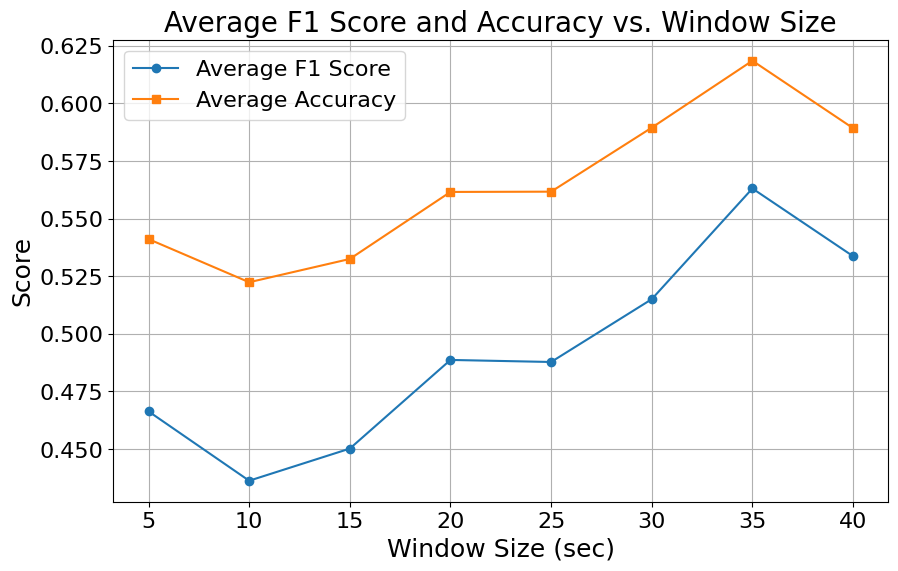

Window size: 5 sec, Average F1 score: 0.466, Average Accuracy: 0.541
Window size: 10 sec, Average F1 score: 0.436, Average Accuracy: 0.522
Window size: 15 sec, Average F1 score: 0.450, Average Accuracy: 0.532
Window size: 20 sec, Average F1 score: 0.489, Average Accuracy: 0.562
Window size: 25 sec, Average F1 score: 0.488, Average Accuracy: 0.562
Window size: 30 sec, Average F1 score: 0.515, Average Accuracy: 0.589
Window size: 35 sec, Average F1 score: 0.563, Average Accuracy: 0.619
Window size: 40 sec, Average F1 score: 0.534, Average Accuracy: 0.589
Best window size (F1 score): 35 sec with average F1 score: 0.563


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score

# Load CSV files into DataFrames
window_sizes = [5 * i for i in range(1, 9)]
dataframes = [pd.read_csv(f"../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_{w}sec.csv") for w in window_sizes]

# Blacklist of participants with missing data
# blacklist = ["22K", "25I", "29N", "39Y", "8I", "32S", "37T"]
blacklist = ['22K', '25I', '27I', '29N', '30Y', '32S', '37T', '39Y', '8I']

global_features = ["NumFix", "AvgFixDur", "NumBlink", "ClosedEyeDur", "AvgPupDia", "VarPupDia", "OffStimFram", "AvgSacAmp", "AvgFixDisp", "LastFixDur"]
time_features = ["NumFix_Sim", "AvgFixDisp_Sim", "AvgFixDur_Sim", "CoveredArea", "det", "revdet", "meanline", "maxline", "ent", "relent", "lam", "tt", "corm", "num_rec", "weighted_num_rec", "num_rec_ratio"]
# Function to prepare data by participant, excluding blacklist
def prepare_data(df):
    df_filtered = df[~df['Participant'].isin(blacklist)]
    X = df_filtered[time_features]
    y = df_filtered['MW']
    groups = df_filtered['Participant']
    return X, y, groups

# Number of iterations and random states
iterations = 10
random_states = range(iterations)

# Loop through each DataFrame and random states
results = {w: {'f1_score': [], 'accuracy': []} for w in window_sizes}
for w, df in zip(window_sizes, dataframes):
    X, y, groups = prepare_data(df)
    # Define the cross-validation strategy
    gkf = GroupKFold(n_splits=5)
    
    # Collect cross-validation scores for each random state
    for random_state in random_states:
        clf = RandomForestClassifier(random_state=random_state)
        f1_scorer = make_scorer(f1_score)
        accuracy_scorer = make_scorer(accuracy_score)
        f1_scores = cross_val_score(clf, X, y, groups=groups, cv=gkf, scoring=f1_scorer)
        accuracy_scores = cross_val_score(clf, X, y, groups=groups, cv=gkf, scoring=accuracy_scorer)
        results[w]['f1_score'].extend(f1_scores)
        results[w]['accuracy'].extend(accuracy_scores)

# Calculate average F1 score and accuracy for each window size
average_results = {w: {'average_f1_score': np.mean(scores['f1_score']), 'average_accuracy': np.mean(scores['accuracy'])} for w, scores in results.items()}

# Convert average_results to a DataFrame for plotting
average_results_df = pd.DataFrame.from_dict(average_results, orient='index').reset_index()
average_results_df.columns = ['window_size', 'average_f1_score', 'average_accuracy']

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(average_results_df['window_size'], average_results_df['average_f1_score'], marker='o', label='Average F1 Score')
plt.plot(average_results_df['window_size'], average_results_df['average_accuracy'], marker='s', label='Average Accuracy')

# Adjust font sizes
plt.xlabel('Window Size (sec)', fontsize=18)
plt.ylabel('Score', fontsize=18)
plt.title('Average F1 Score and Accuracy vs. Window Size', fontsize=20)
plt.legend(fontsize=16)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

# Print results
for w, metrics in average_results.items():
    print(f"Window size: {w} sec, Average F1 score: {metrics['average_f1_score']:.3f}, Average Accuracy: {metrics['average_accuracy']:.3f}")

# Find the best window size based on F1 score
best_window_f1 = max(average_results, key=lambda w: average_results[w]['average_f1_score'])
print(f"Best window size (F1 score): {best_window_f1} sec with average F1 score: {average_results[best_window_f1]['average_f1_score']:.3f}")

**All models + Global Features + F1 score**

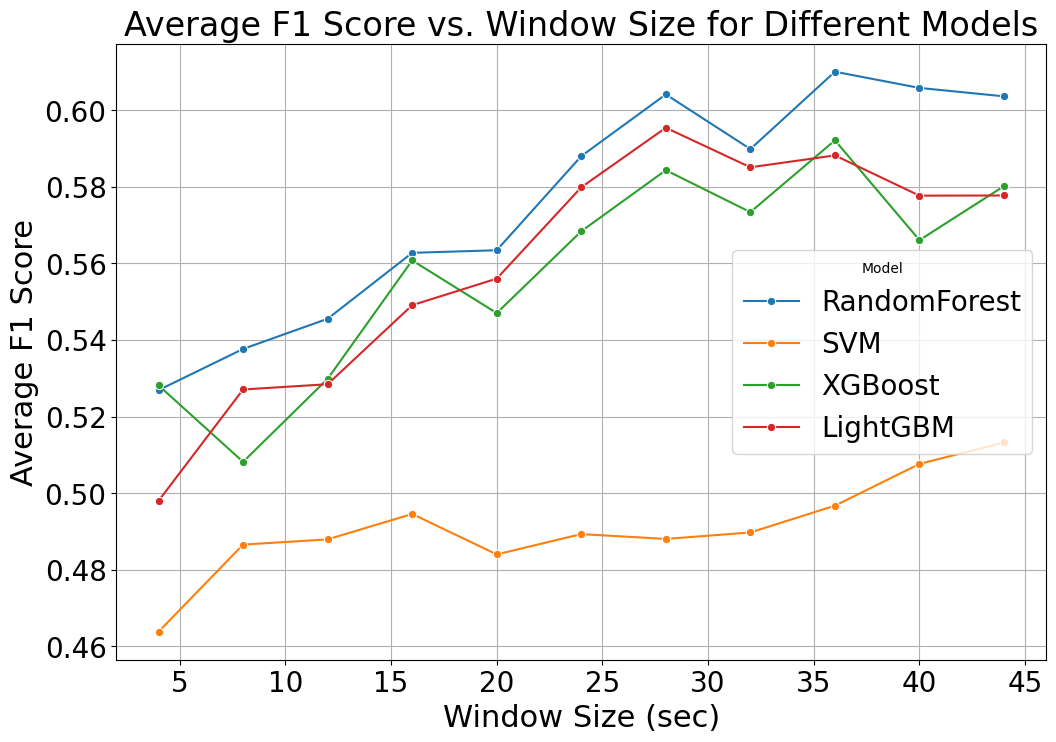

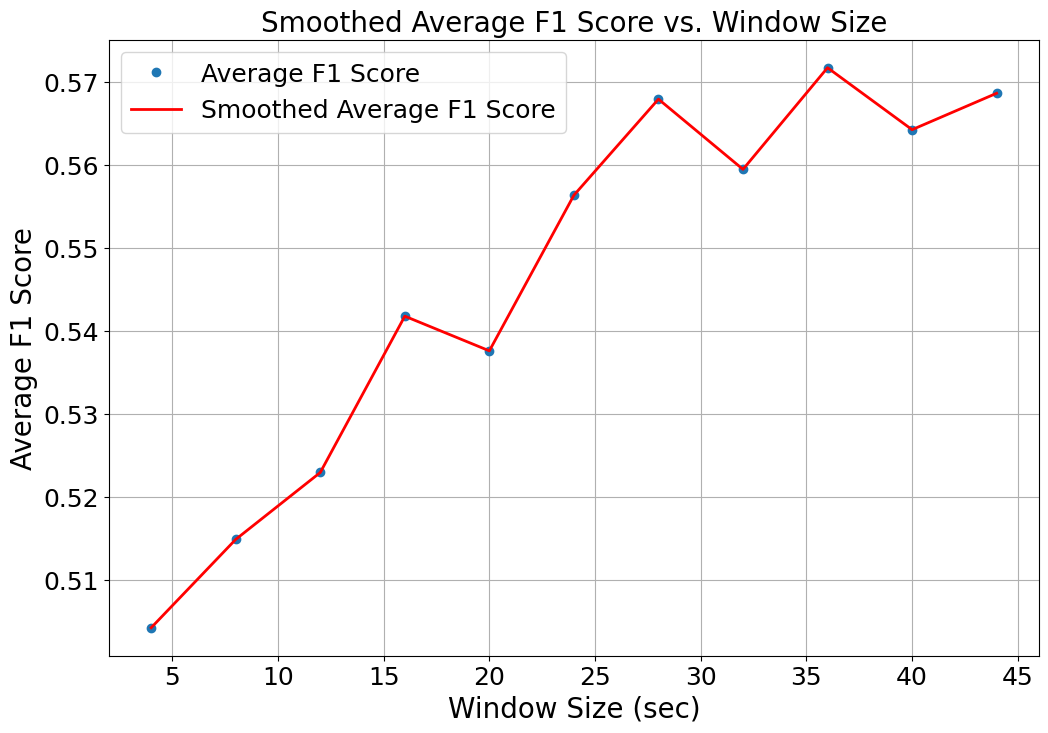

Overall Average F1 Scores:
  Window size: 4 sec, Average F1 Score: 0.504
  Window size: 8 sec, Average F1 Score: 0.515
  Window size: 12 sec, Average F1 Score: 0.523
  Window size: 16 sec, Average F1 Score: 0.542
  Window size: 20 sec, Average F1 Score: 0.538
  Window size: 24 sec, Average F1 Score: 0.556
  Window size: 28 sec, Average F1 Score: 0.568
  Window size: 32 sec, Average F1 Score: 0.559
  Window size: 36 sec, Average F1 Score: 0.572
  Window size: 40 sec, Average F1 Score: 0.564
  Window size: 44 sec, Average F1 Score: 0.569
Best window size based on overall smoothed average F1 score: 36.0 sec


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, f1_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load CSV files into DataFrames
window_sizes = [4 * i for i in range(1, 12)]
dataframes = [pd.read_csv(f"../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_{w}sec.csv") for w in window_sizes]

global_features = ["NumFix", "AvgFixDur", "NumBlink", "ClosedEyeDur", "AvgPupDia", "VarPupDia", "OffStimFram", "AvgSacAmp", "AvgFixDisp"]
time_features = ["NumFix_Sim", "AvgFixDisp_Sim", "AvgFixDur_Sim", "CoveredArea", "det", "revdet", "meanline", "maxline", "ent", "relent", "lam", "tt", "corm", "num_rec", "weighted_num_rec", "num_rec_ratio"]

# blacklist = ["22K", "25I", "29N", "39Y", "8I", "32S", "37T"]
blacklist = ['22K', '25I', '27I', '29N', '30Y', '32S', '37T', '39Y', '8I']

# Function to prepare data by participant, excluding blacklist
def prepare_data(df):
    df_filtered = df[~df['Participant'].isin(blacklist)]
    X = df_filtered[global_features]
    y = df_filtered['MW']
    groups = df_filtered['Participant']
    return X, y, groups

# Number of iterations and random states
iterations = 5
random_states = range(iterations)

# Models to evaluate
models = {
    'RandomForest': RandomForestClassifier,
    'SVM': SVC,
    'XGBoost': XGBClassifier,
    'LightGBM': lambda random_state: LGBMClassifier(random_state=random_state, verbose=-1)  # Suppress LightGBM warnings
}

# Loop through each DataFrame, model, and random state
results = {w: {model: [] for model in models} for w in window_sizes}
for w, df in zip(window_sizes, dataframes):
    X, y, groups = prepare_data(df)
    gkf = GroupKFold(n_splits=5)
    
    for model_name, model in models.items():
        for random_state in random_states:
            pipeline = Pipeline([
                ('imputer', SimpleImputer(strategy='mean')),
                ('classifier', model(random_state=random_state) if model_name not in ['SVM'] else model())
            ])
            f1_scores = cross_val_score(pipeline, X, y, groups=groups, cv=gkf, scoring=make_scorer(f1_score, average='weighted'))
            results[w][model_name].extend(f1_scores)

# Calculate average F1 score for each model and window size
average_results = {w: {model: np.mean(scores) for model, scores in models_scores.items()} for w, models_scores in results.items()}

# Convert average_results to a DataFrame for plotting
average_results_df = pd.DataFrame.from_dict(average_results, orient='index').reset_index().melt(id_vars='index')
average_results_df.columns = ['window_size', 'model', 'average_f1_score']

# Plot F1 score changes for all models
plt.figure(figsize=(12, 8))
sns.lineplot(x='window_size', y='average_f1_score', hue='model', data=average_results_df, marker='o')

# Adjust font sizes
plt.xlabel('Window Size (sec)', fontsize=22)
plt.ylabel('Average F1 Score', fontsize=22)
plt.title('Average F1 Score vs. Window Size for Different Models', fontsize=24)
plt.legend(title='Model', fontsize=20)
plt.grid(True)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Calculate overall average F1 score for each window size
overall_average_f1_score = {w: np.mean(list(models_scores.values())) for w, models_scores in average_results.items()}

# Convert overall_average_f1_score to a DataFrame for smoothing and plotting
overall_average_df = pd.DataFrame(list(overall_average_f1_score.items()), columns=['window_size', 'average_f1_score'])

# Smooth the curve using LOWESS
smoothed = lowess(overall_average_df['average_f1_score'], overall_average_df['window_size'], frac=0.3)

# Plot the smoothed curve of overall average F1 score
plt.figure(figsize=(12, 8))
plt.plot(overall_average_df['window_size'], overall_average_df['average_f1_score'], 'o', label='Average F1 Score')
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', label='Smoothed Average F1 Score', linewidth=2)

# Adjust font sizes
plt.xlabel('Window Size (sec)', fontsize=20)
plt.ylabel('Average F1 Score', fontsize=20)
plt.title('Smoothed Average F1 Score vs. Window Size', fontsize=20)
plt.legend(fontsize=18)
plt.grid(True)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# Print overall average F1 scores
print("Overall Average F1 Scores:")
for w, avg_f1_score in overall_average_f1_score.items():
    print(f"  Window size: {w} sec, Average F1 Score: {avg_f1_score:.3f}")

# Find the best window size based on smoothed curve
best_window_size = smoothed[np.argmax(smoothed[:, 1]), 0]
print(f"Best window size based on overall smoothed average F1 score: {best_window_size:.1f} sec")


**Global Only**

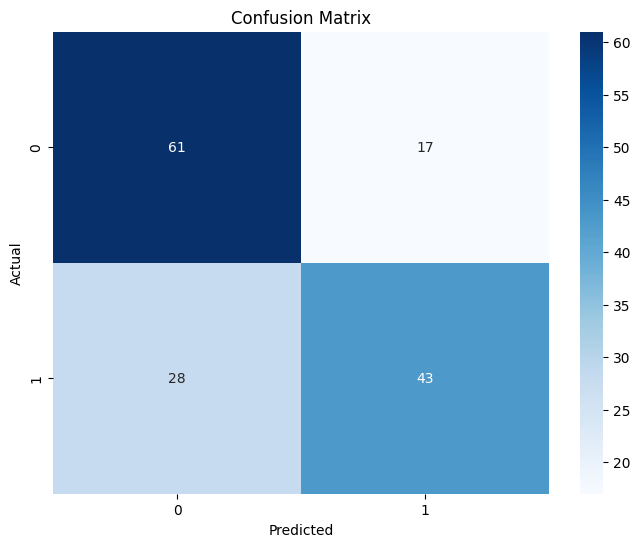

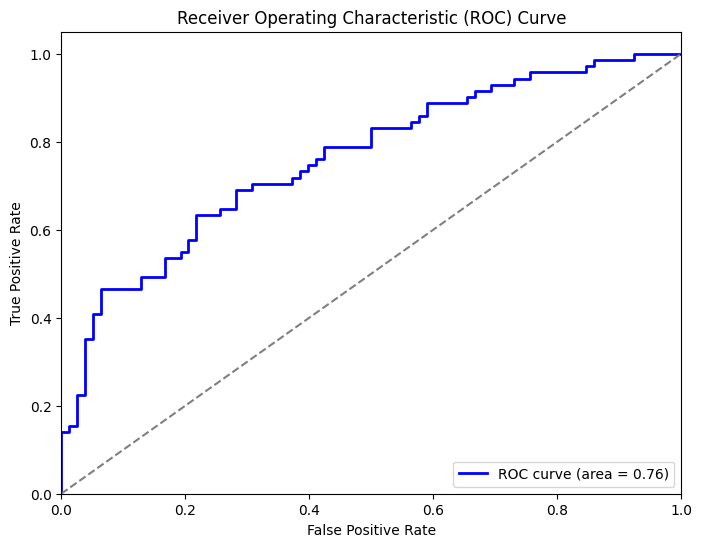

Accuracy: 0.698
F1 score: 0.656
Precision: 0.717
Recall: 0.606

Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.78      0.73        78
           1       0.72      0.61      0.66        71

    accuracy                           0.70       149
   macro avg       0.70      0.69      0.69       149
weighted avg       0.70      0.70      0.70       149


Feature Importances:
AvgFixDisp: 0.1532
VarPupDia: 0.1396
NumFix: 0.1312
ClosedEyeDur: 0.1258
AvgFixDur: 0.1237
AvgPupDia: 0.1102
NumBlink: 0.1088
AvgSacAmp: 0.1074


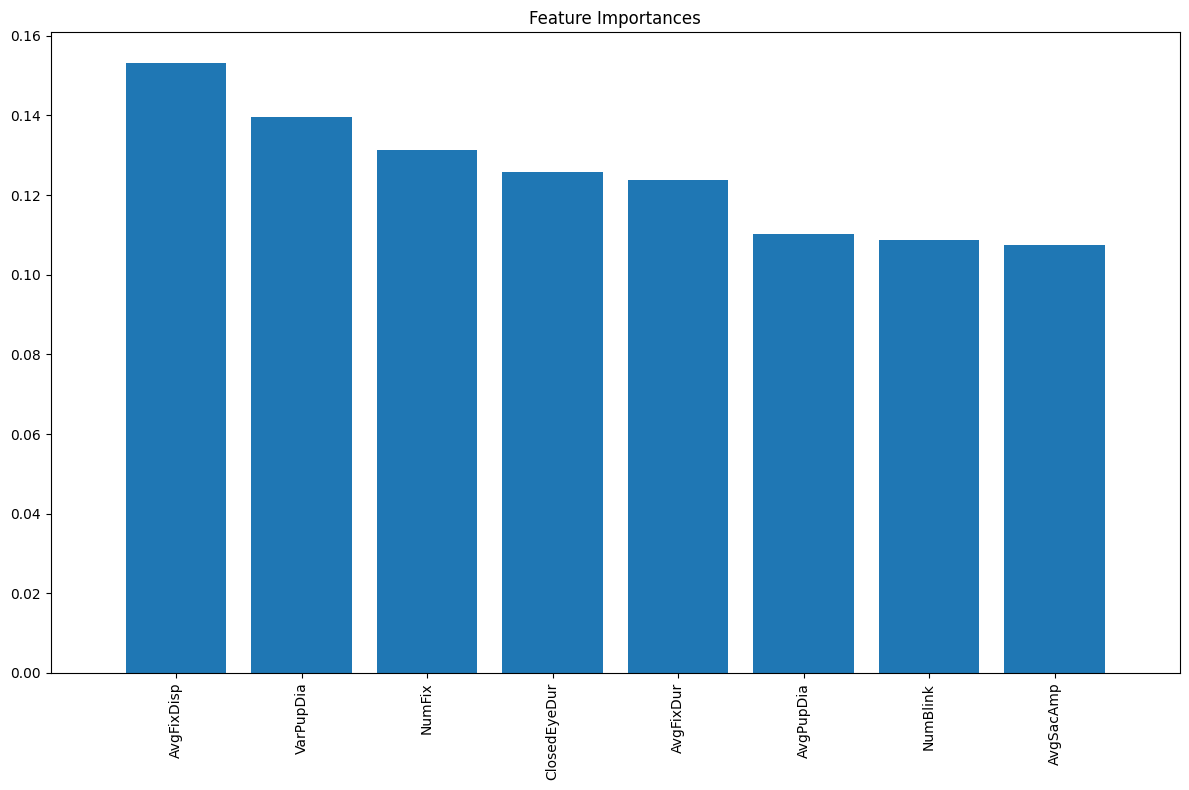


Best Hyperparameters:
clf__max_depth: 10
clf__min_samples_leaf: 2
clf__min_samples_split: 5
clf__n_estimators: 100


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GroupKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data for the best window size (30 sec)
window_size = 28
df = pd.read_csv(f"../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_{window_size}sec.csv")

# Blacklist of participants with missing data
blacklist = ['22K', '25I', '27I', '29N', '30Y', '32S', '37T', '39Y', '8I']

global_features = ["NumFix", "AvgFixDur", "NumBlink", "ClosedEyeDur", "AvgPupDia", "VarPupDia", "AvgSacAmp", "AvgFixDisp"]
time_features = ["NumFix_Sim", "AvgFixDisp_Sim", "AvgFixDur_Sim", "CoveredArea", "det", "revdet", "meanline", "maxline", "ent", "relent", "lam", "tt", "corm", "num_rec", "weighted_num_rec", "num_rec_ratio"]
content_dependent_features = ["OffStimFram", "Test"]

# Prepare the data
df_filtered = df[~df['Participant'].isin(blacklist)]
# X = df_filtered.drop(columns=['MW', 'Attention', 'Participant', 'Stimuli'])
X = df_filtered[global_features]
y = df_filtered['MW']
groups = df_filtered['Participant']

# Train-test split ensuring stratification by groups
X_train, X_test, y_train, y_test, train_groups, test_groups = train_test_split(X, y, groups, test_size=0.2, stratify=groups, random_state=42)

# Define the pipeline with StandardScaler and RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2]
}


# Define GroupKFold cross-validator
cv = GroupKFold(n_splits=5)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train, groups=train_groups)

# Best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Train the best estimator on the entire training set
best_estimator.fit(X_train, y_train)

# Predict on the test set
y_pred = best_estimator.predict(X_test)
y_pred_prob = best_estimator.predict_proba(X_test)[:, 1]

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate and plot evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"F1 score: {f1:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Feature importance
importances = best_estimator.named_steps['clf'].feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Print feature importance values
print("\nFeature Importances:")
for feature, importance in zip(features[indices], importances[indices]):
    print(f"{feature}: {importance:.4f}")

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

# Print the best hyperparameters
print("\nBest Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")


**Global + Time**

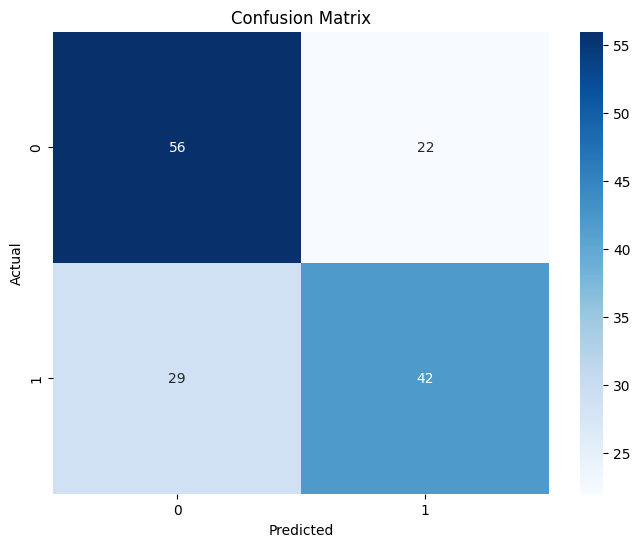

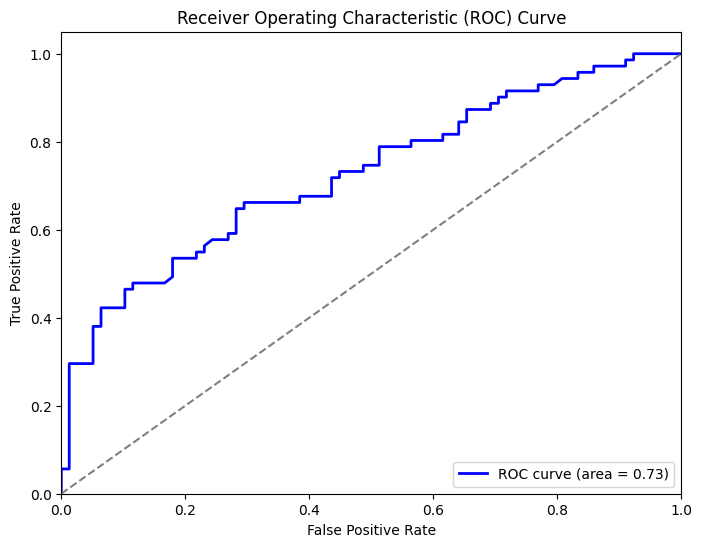

Accuracy: 0.658
F1 score: 0.622
Precision: 0.656
Recall: 0.592

Classification Report:

              precision    recall  f1-score   support

           0       0.66      0.72      0.69        78
           1       0.66      0.59      0.62        71

    accuracy                           0.66       149
   macro avg       0.66      0.65      0.65       149
weighted avg       0.66      0.66      0.66       149


Feature Importances:


IndexError: index 34 is out of bounds for axis 0 with size 24

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GroupKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data for the best window size (30 sec)
window_size = 28
df = pd.read_csv(f"../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_{window_size}sec.csv")

# Blacklist of participants with missing data
blacklist = ['22K', '25I', '27I', '29N', '30Y', '32S', '37T', '39Y', '8I']

global_features = ["NumFix", "AvgFixDur", "NumBlink", "ClosedEyeDur", "AvgPupDia", "VarPupDia", "AvgSacAmp", "AvgFixDisp"]
time_features = ["NumFix_Sim", "AvgFixDisp_Sim", "AvgFixDur_Sim", "CoveredArea", "det", "revdet", "meanline", "maxline", "ent", "relent", "lam", "tt", "corm", "num_rec", "weighted_num_rec", "num_rec_ratio"]
content_dependent_features = ["OffStimFram", "Test"]

# Prepare the data
df_filtered = df[~df['Participant'].isin(blacklist)]
X = df_filtered[global_features + time_features]
y = df_filtered['MW']
groups = df_filtered['Participant']

# Train-test split ensuring stratification by groups
X_train, X_test, y_train, y_test, train_groups, test_groups = train_test_split(X, y, groups, test_size=0.2, stratify=groups, random_state=42)

# Define the pipeline with Imputer, PolynomialFeatures, StandardScaler, and RandomForestClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'clf__n_estimators': [100, 200, 300, 400],
    'clf__max_depth': [None, 10, 20, 30, 40],
    'clf__min_samples_split': [2, 5, 10, 15],
    'clf__min_samples_leaf': [1, 2, 4, 6],
    'clf__bootstrap': [True, False]
}

# Define GroupKFold cross-validator
cv = GroupKFold(n_splits=5)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, n_iter=100, cv=cv, n_jobs=-1, scoring='f1', random_state=42)
random_search.fit(X_train, y_train, groups=train_groups)

# Best parameters and estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

# Train the best estimator on the entire training set
best_estimator.fit(X_train, y_train)

# Predict on the test set
y_pred = best_estimator.predict(X_test)
y_pred_prob = best_estimator.predict_proba(X_test)[:, 1]

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate and plot evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"F1 score: {f1:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Feature importance
importances = best_estimator.named_steps['clf'].feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Print feature importance values
print("\nFeature Importances:")
for feature, importance in zip(features[indices], importances[indices]):
    print(f"{feature}: {importance:.4f}")

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

# Print the best hyperparameters
print("\nBest Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")


**Global + Time + CD**

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GroupKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data for the best window size (30 sec)
window_size = 28
df = pd.read_csv(f"../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_{window_size}sec.csv")

# Blacklist of participants with missing data
blacklist = ['22K', '25I', '27I', '29N', '30Y', '32S', '37T', '39Y', '8I']

global_features = ["NumFix", "AvgFixDur", "NumBlink", "ClosedEyeDur", "AvgPupDia", "VarPupDia", "AvgSacAmp", "AvgFixDisp"]
time_features = ["NumFix_Sim", "AvgFixDisp_Sim", "AvgFixDur_Sim", "CoveredArea", "det", "revdet", "meanline", "maxline", "ent", "relent", "lam", "tt", "corm", "num_rec", "weighted_num_rec", "num_rec_ratio"]
content_dependent_features = ["OffStimFram", "Test"]

# Prepare the data
df_filtered = df[~df['Participant'].isin(blacklist)]
# X = df_filtered.drop(columns=['MW', 'Attention', 'Participant', 'Stimuli'])
X = df_filtered[global_features + time_features + content_dependent_features]
y = df_filtered['Attention']
groups = df_filtered['Participant']

# Train-test split ensuring stratification by groups
X_train, X_test, y_train, y_test, train_groups, test_groups = train_test_split(X, y, groups, test_size=0.2, stratify=groups, random_state=42)

# Define the pipeline with StandardScaler and RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10, 15],
    'clf__min_samples_leaf': [1, 2, 4]
}


# Define GroupKFold cross-validator
cv = GroupKFold(n_splits=5)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train, groups=train_groups)

# Best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Train the best estimator on the entire training set
best_estimator.fit(X_train, y_train)

# Predict on the test set
y_pred = best_estimator.predict(X_test)
y_pred_prob = best_estimator.predict_proba(X_test)[:, 1]

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate and plot evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"F1 score: {f1:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Feature importance
importances = best_estimator.named_steps['clf'].feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Print feature importance values
print("\nFeature Importances:")
for feature, importance in zip(features[indices], importances[indices]):
    print(f"{feature}: {importance:.4f}")

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

# Print the best hyperparameters
print("\nBest Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")


KeyError: "['Test'] not in index"

**Feature Selection**

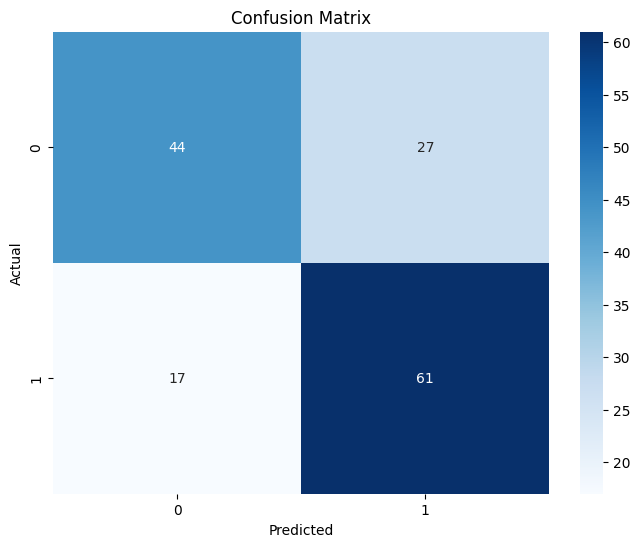

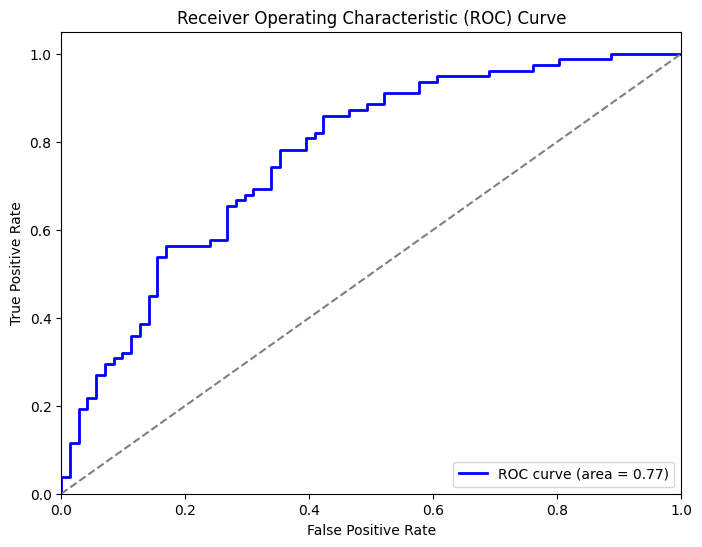

Accuracy: 0.705
F1 score: 0.735
Precision: 0.693
Recall: 0.782

Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.62      0.67        71
           1       0.69      0.78      0.73        78

    accuracy                           0.70       149
   macro avg       0.71      0.70      0.70       149
weighted avg       0.71      0.70      0.70       149


Feature Importances:
NumFix: 0.1228
AvgFixDur: 0.1225
CoveredArea: 0.1148
ClosedEyeDur: 0.1146
AvgFixDisp: 0.1138
AvgFixDisp_Sim: 0.1133
VarPupDia: 0.1116
AvgPupDia: 0.1026
NumFix_Sim: 0.0841


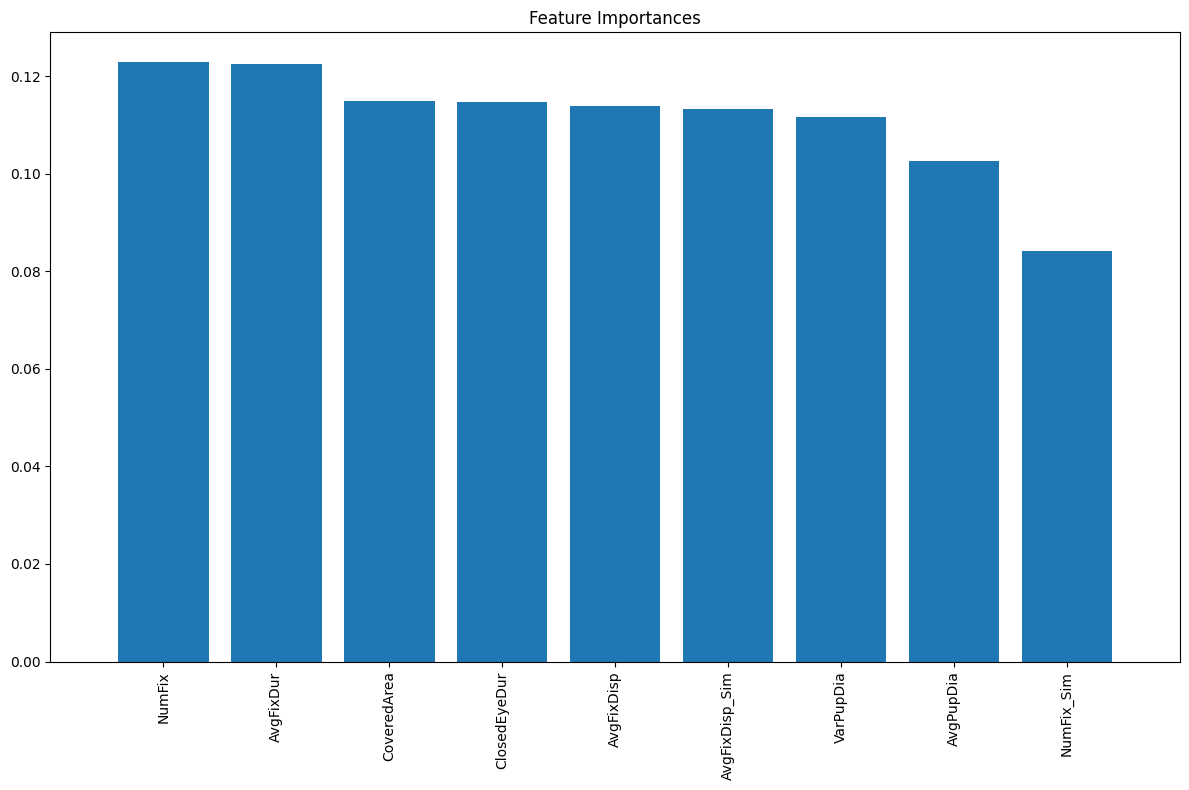


Best Hyperparameters:
clf__max_depth: 10
clf__min_samples_leaf: 2
clf__min_samples_split: 2
clf__n_estimators: 300


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GroupKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data for the best window size (30 sec)
window_size = 30
df = pd.read_csv(f"../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_{window_size}sec.csv")

# Blacklist of participants with missing data
blacklist = ['22K', '25I', '27I', '29N', '30Y', '32S', '37T', '39Y', '8I']

# Prepare the data
df_filtered = df[~df['Participant'].isin(blacklist)]
X = df_filtered.drop(columns=['MW', 'Attention', 'Participant', 'Stimuli'])
y = df_filtered['Attention']
groups = df_filtered['Participant']

# Select top N important features
top_features = 9  # Select top 10 important features
feature_importances = pd.Series(RandomForestClassifier(random_state=42).fit(X, y).feature_importances_, index=X.columns)
selected_features = feature_importances.nlargest(top_features).index
X_selected = X[selected_features]

# Train-test split ensuring stratification by groups
X_train, X_test, y_train, y_test, train_groups, test_groups = train_test_split(X_selected, y, groups, test_size=0.2, stratify=groups, random_state=42)

# Define the pipeline with StandardScaler and RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(random_state=42))
])

# Define parameter grid for GridSearchCV
param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10, 15],
    'clf__min_samples_leaf': [1, 2, 4]
}

# Define GroupKFold cross-validator
cv = GroupKFold(n_splits=5)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, n_jobs=-1, scoring='f1')
grid_search.fit(X_train, y_train, groups=train_groups)

# Best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Train the best estimator on the entire training set
best_estimator.fit(X_train, y_train)

# Predict on the test set
y_pred = best_estimator.predict(X_test)
y_pred_prob = best_estimator.predict_proba(X_test)[:, 1]

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate and plot evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"F1 score: {f1:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Feature importance
importances = best_estimator.named_steps['clf'].feature_importances_
indices = np.argsort(importances)[::-1]
features = X_selected.columns

# Print feature importance values
print("\nFeature Importances:")
for feature, importance in zip(features[indices], importances[indices]):
    print(f"{feature}: {importance:.4f}")

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X_selected.shape[1]), importances[indices], align="center")
plt.xticks(range(X_selected.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X_selected.shape[1]])
plt.tight_layout()
plt.show()

# Print the best hyperparameters
print("\nBest Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")


### 3. Feature Importance
#### 3.1. Check for Multicollinearity Using the Variance Inflation Factor (VIF)

In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
df = pd.read_csv('../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_28sec.csv')

# blacklist = ["22K", "25I", "29N", "39Y", "8I", "32S", "37T"]
blacklist = ['22K', '25I', '27I', '29N', '30Y', '32S', '37T', '39Y', '8I']
df = df[~df['Participant'].isin(blacklist)]

global_features = ["NumFix", "AvgFixDur", "NumBlink", "ClosedEyeDur", "AvgPupDia", "VarPupDia", "OffStimFram", "AvgSacAmp", "AvgFixDisp", "LastFixDur"]
time_features = ["NumFix_Sim", "AvgFixDisp_Sim", "AvgFixDur_Sim", "CoveredArea", "det", "revdet", "meanline", "maxline", "ent", "relent", "lam", "tt", "corm", "num_rec", "weighted_num_rec", "num_rec_ratio"]

# Prepare the data
X = df[time_features]
y = df['MW']

# Handle missing values by dropping rows with NaNs or infs
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

def calculate_vif(X):
    X_with_const = sm.add_constant(X)
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_with_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
    return vif_data

# Iteratively remove features with high VIF
max_vif = 10
while True:
    vif_data = calculate_vif(X_scaled)
    if vif_data["VIF"].max() > max_vif:
        feature_to_remove = vif_data.sort_values("VIF", ascending=False).iloc[0]["Feature"]
        if feature_to_remove == "const":
            break
        X_scaled = X_scaled.drop(columns=[feature_to_remove])
        print(f"Removed {feature_to_remove} with VIF {vif_data['VIF'].max()}")
    else:
        break

print(calculate_vif(X_scaled))


Removed ent with VIF 186.87023999409988
Removed meanline with VIF 16.508305603347484
Removed weighted_num_rec with VIF 15.86478584197311
Removed lam with VIF 11.341659338251832
           Feature       VIF
0            const  1.000000
1       NumFix_Sim  4.622262
2   AvgFixDisp_Sim  2.250258
3    AvgFixDur_Sim  2.490754
4      CoveredArea  4.637841
5              det  8.528868
6           revdet  5.040133
7          maxline  5.549956
8           relent  4.956305
9               tt  5.365459
10            corm  1.707122
11         num_rec  4.626283
12   num_rec_ratio  4.658377


**当分析で変数が多すぎると有意性が出なくなるので，global, time, CDに分ける**

In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_28sec.csv')

# blacklist = ["22K", "25I", "29N", "39Y", "8I", "32S", "37T"]
blacklist = ['22K', '25I', '27I', '29N', '30Y', '32S', '37T', '39Y', '8I']
df = df[~df['Participant'].isin(blacklist)]
high_vif_cols = []

global_features = ["NumFix", "AvgFixDur", "NumBlink", "ClosedEyeDur", "AvgPupDia", "VarPupDia", "OffStimFram", "AvgSacAmp", "AvgFixDisp", "LastFixDur"]
time_features = ["NumFix_Sim", "AvgFixDisp_Sim", "AvgFixDur_Sim", "CoveredArea", "det", "revdet", "meanline", "maxline", "ent", "relent", "lam", "tt", "corm", "num_rec", "weighted_num_rec", "num_rec_ratio"]

# Prepare the data
X = df[global_features]
y = df['MW']

# Handle missing values by dropping rows with NaNs or infs
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

# Align y with the cleaned X
y = y.loc[X.index]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# # Drop variables with high VIF values to address multicollinearity
X_normalized_reduced = X_scaled.drop(columns=high_vif_cols)
# X_normalized_reduced = X_scaled

# Add a constant to the model (intercept)
X_normalized_reduced = sm.add_constant(X_normalized_reduced)

# Ensure y is aligned with the final X_normalized_reduced
y = y.loc[X_normalized_reduced.index]

# Fit a logistic regression model
logit_model_reduced = sm.Logit(y, X_normalized_reduced).fit()

# Display the summary of the reduced logistic regression model
print(logit_model_reduced.summary())


Optimization terminated successfully.
         Current function value: 0.634204
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                     MW   No. Observations:                  744
Model:                          Logit   Df Residuals:                      733
Method:                           MLE   Df Model:                           10
Date:                Wed, 17 Jul 2024   Pseudo R-squ.:                 0.08293
Time:                        18:03:32   Log-Likelihood:                -471.85
converged:                       True   LL-Null:                       -514.52
Covariance Type:            nonrobust   LLR p-value:                 4.481e-14
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0987      0.078     -1.261      0.207      -0.252       0.055
NumFix          -0.4143

In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_28sec.csv')

# blacklist = ["22K", "25I", "29N", "39Y", "8I", "32S", "37T"]
blacklist = ['22K', '25I', '27I', '29N', '30Y', '32S', '37T', '39Y', '8I']
df = df[~df['Participant'].isin(blacklist)]
high_vif_cols = ["ent", "weighted_num_rec", "meanline", "lam", "NumFix_Sim", "AvgFixDisp_Sim", "AvgFixDur_Sim"]

global_features = ["NumFix", "AvgFixDur", "NumBlink", "ClosedEyeDur", "AvgPupDia", "VarPupDia", "OffStimFram", "AvgSacAmp", "AvgFixDisp", "LastFixDur"]
time_features = ["NumFix_Sim", "AvgFixDisp_Sim", "AvgFixDur_Sim", "CoveredArea", "det", "revdet", "meanline", "maxline", "ent", "relent", "lam", "tt", "corm", "num_rec", "weighted_num_rec", "num_rec_ratio"]

# Prepare the data
X = df[time_features]
y = df['MW']

# Handle missing values by dropping rows with NaNs or infs
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

# Align y with the cleaned X
y = y.loc[X.index]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# # Drop variables with high VIF values to address multicollinearity
X_normalized_reduced = X_scaled.drop(columns=high_vif_cols)
# X_normalized_reduced = X_scaled

# Add a constant to the model (intercept)
X_normalized_reduced = sm.add_constant(X_normalized_reduced)

# Ensure y is aligned with the final X_normalized_reduced
y = y.loc[X_normalized_reduced.index]

# Fit a logistic regression model
logit_model_reduced = sm.Logit(y, X_normalized_reduced).fit()

# Display the summary of the reduced logistic regression model
print(logit_model_reduced.summary())


Optimization terminated successfully.
         Current function value: 0.642958
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                     MW   No. Observations:                  720
Model:                          Logit   Df Residuals:                      710
Method:                           MLE   Df Model:                            9
Date:                Wed, 17 Jul 2024   Pseudo R-squ.:                 0.06942
Time:                        18:03:53   Log-Likelihood:                -462.93
converged:                       True   LL-Null:                       -497.46
Covariance Type:            nonrobust   LLR p-value:                 2.316e-11
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1257      0.079     -1.597      0.110      -0.280       0.029
CoveredArea      -0.

**重要な特徴量のみ使用**

In [58]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_30sec.csv')

# blacklist = ["22K", "25I", "29N", "39Y", "8I", "32S", "37T"]
blacklist = ['22K', '25I', '27I', '29N', '30Y', '32S', '37T', '39Y', '8I']
df = df[~df['Participant'].isin(blacklist)]

important_features = ['NumFix', 'AvgFixDisp', 'CoveredArea', 'maxline', 'relent']  

# Prepare the data
X = df[important_features]
y = df['MW']

# Handle missing values by dropping rows with NaNs or infs
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

# Align y with the cleaned X
y = y.loc[X.index]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# # Drop variables with high VIF values to address multicollinearity
X_normalized_reduced = X_scaled.drop(columns=high_vif_cols)
# X_normalized_reduced = X_scaled

# Add a constant to the model (intercept)
X_normalized_reduced = sm.add_constant(X_normalized_reduced)

# Ensure y is aligned with the final X_normalized_reduced
y = y.loc[X_normalized_reduced.index]

# Fit a logistic regression model
logit_model_reduced = sm.Logit(y, X_normalized_reduced).fit()

# Display the summary of the reduced logistic regression model
print(logit_model_reduced.summary())


Optimization terminated successfully.
         Current function value: 0.634459
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                     MW   No. Observations:                  740
Model:                          Logit   Df Residuals:                      734
Method:                           MLE   Df Model:                            5
Date:                Tue, 02 Jul 2024   Pseudo R-squ.:                 0.08254
Time:                        15:36:03   Log-Likelihood:                -469.50
converged:                       True   LL-Null:                       -511.74
Covariance Type:            nonrobust   LLR p-value:                 9.709e-17
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1104      0.078     -1.414      0.157      -0.263       0.043
NumFix         -0.3785    

**Features Differences between MW=0 and MW=1**

                     MW=0 Mean      MW=0 Std     MW=1 Mean      MW=1 Std  \
NumFix               65.842239     11.490038     57.854701     15.446275   
AvgFixDur           312.414156     76.274583    313.965895    105.626784   
NumBlink             13.653944      9.110285     14.629630      8.295584   
ClosedEyeDur        235.933533    260.965561    380.831756    477.342161   
AvgPupDia             3.675934      0.549428      3.623553      0.631182   
VarPupDia             0.162219      0.123470      0.191129      0.125573   
OffStimFram          25.157761     37.247456     26.253561     38.373891   
AvgSacAmp             5.887307      1.338511      5.883306      1.401941   
AvgFixDisp            0.214233      0.042339      0.193082      0.045382   
LastFixDur          259.966073    270.209877    254.795821    241.736340   
NumFix_Sim           38.488550      8.790968     34.328571     10.580191   
AvgFixDisp_Sim      357.036285     70.778830    327.239346     70.716900   
AvgFixDur_Si

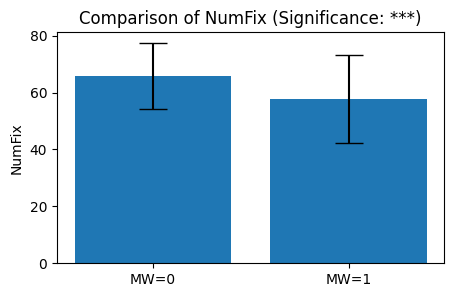

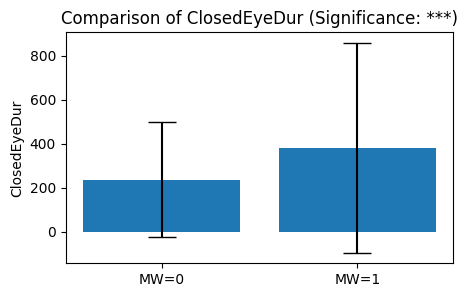

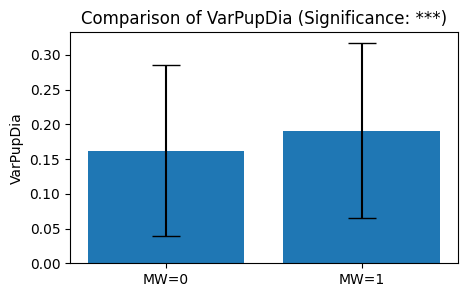

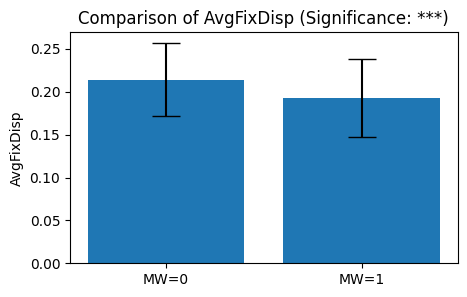

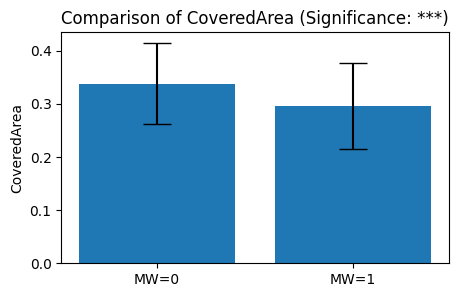

In [34]:

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the dataset
file_path = '../../../../Analysis/Summary/FreeViewing/Data/FreeViewing_Summary_30sec.csv'
data = pd.read_csv(file_path)

# Define the blacklist
# blacklist = ["22K", "25I", "29N", "39Y", "8I", "32S", "37T"]
blacklist = ['22K', '25I', '27I', '29N', '30Y', '32S', '37T', '39Y', '8I']

# Filter out the blacklisted participants
filtered_data = data[~data['Participant'].isin(blacklist)]

# Separate the data based on MW=0 and MW=1
mw_0_data = filtered_data[filtered_data['MW'] == 0]
mw_1_data = filtered_data[filtered_data['MW'] == 1]

# Calculate the average and standard deviation for each feature in MW=0 group
mw_0_stats = mw_0_data.describe().loc[['mean', 'std']]

# Calculate the average and standard deviation for each feature in MW=1 group
mw_1_stats = mw_1_data.describe().loc[['mean', 'std']]

# Remove the 'Attention', and 'MW' columns from the statistics dataframes
mw_0_stats_filtered = mw_0_stats.drop(columns=['Attention', 'MW'])
mw_1_stats_filtered = mw_1_stats.drop(columns=['Attention', 'MW'])

# Perform t-tests for each feature to compare MW=0 and MW=1 groups
ttest_results = {}
for column in mw_0_stats_filtered.columns:
    t_stat, p_value = ttest_ind(mw_0_data[column], mw_1_data[column], equal_var=False)  # Welch's t-test
    ttest_results[column] = {'t-statistic': t_stat, 'p-value': p_value}

# Convert the results to a DataFrame for better visualization
ttest_results_df = pd.DataFrame(ttest_results).T

# Mapping p-values to significance levels
def significance_level(p):
    if p < 0.01:
        return "***"
    elif p < 0.05:
        return "**"
    elif p < 0.1:
        return "*"
    else:
        return ""

# Apply significance mapping
ttest_results_df['Significance'] = ttest_results_df['p-value'].apply(significance_level)

# Combine the statistics and t-test results into a single dataframe for easier comparison
combined_stats = pd.concat([mw_0_stats_filtered.T, mw_1_stats_filtered.T], axis=1)
combined_stats = combined_stats.join(ttest_results_df['Significance'])

# Rename columns for clarity
combined_stats.columns = ['MW=0 Mean', 'MW=0 Std', 'MW=1 Mean', 'MW=1 Std', 'Significance']

print(combined_stats)

# Plotting the statistically significant features
significant_features = combined_stats[combined_stats['Significance'] != ""].index

for feature in significant_features:
    plt.figure(figsize=(5, 3))
    plt.bar(['MW=0', 'MW=1'], [mw_0_stats_filtered.loc['mean', feature], mw_1_stats_filtered.loc['mean', feature]], 
            yerr=[mw_0_stats_filtered.loc['std', feature], mw_1_stats_filtered.loc['std', feature]], capsize=10)
    plt.title(f'Comparison of {feature} (Significance: {combined_stats.loc[feature, "Significance"]})')
    plt.ylabel(feature)
    plt.show()
